# Semana 19: Tomar decisiones de negocio basadas en datos 💹

## 💼 Las bases de la verificación de hipótesis en negocio 
Las decisiones basadas en datos ayudan a minimizar riesgos. En este capítulo aprenderás cómo identificar métricas relevantes y formular hipótesis útiles para el negocio.

### ❓ ¿Qué necesita un negocio? 
Un negocio necesita **indicadores** claros que le permitan saber si va por buen camino. Estos indicadores pueden ser ventas, retención, número de clientes, etc.

In [1]:
# Supongamos que tienes un DataFrame con datos de conversión
import pandas as pd
datos = pd.DataFrame({
    "dia": pd.date_range("2024-01-01", periods=10, freq="D"),
    "usuarios": [100, 120, 130, 90, 140, 110, 115, 150, 160, 170],
    "conversiones": [10, 15, 18, 9, 20, 11, 13, 25, 28, 30]
})
datos["tasa_conversion"] = datos["conversiones"] / datos["usuarios"]
datos

,dia,usuarios,conversiones,tasa_conversion
0,2024-01-01,100,10,0.100000
1,2024-01-02,120,15,0.125000
2,2024-01-03,130,18,0.138462
3,2024-01-04,90,9,0.100000
4,2024-01-05,140,20,0.142857
5,2024-01-06,110,11,0.100000
6,2024-01-07,115,13,0.113043
7,2024-01-08,150,25,0.166667
8,2024-01-09,160,28,0.175000
9,2024-01-10,170,30,0.176471


### 📈 Métricas leading. Descomposición
Las métricas leading son aquellas que predicen resultados futuros (como clics → ventas).

In [2]:
# Analicemos si los clics predicen conversiones
datos["clics"] = [200, 210, 250, 190, 300, 230, 240, 320, 350, 360]
datos["CTR"] = datos["conversiones"] / datos["clics"]
datos[["clics", "conversiones", "CTR"]]

,clics,conversiones,CTR
0,200,10,0.050000
1,210,15,0.071429
2,250,18,0.072000
3,190,9,0.047368
4,300,20,0.066667
5,230,11,0.047826
6,240,13,0.054167
7,320,25,0.078125
8,350,28,0.080000
9,360,30,0.083333


### 📊 Identificación de métricas importantes
Evalúa si una métrica tiene correlación con el resultado deseado.

In [3]:
corr = datos[["clics", "conversiones"]].corr()
print("Correlación entre clics y conversiones:\n", corr)

Correlación entre clics y conversiones:
                  clics  conversiones
clics         1.000000      0.967855
conversiones  0.967855      1.000000


### 📋 Registros de experimentos
Llevar registro ayuda a analizar resultados de pruebas A/B.

In [4]:
experimentos = pd.DataFrame({
    "experimento": ["A", "B"],
    "usuarios": [1000, 980],
    "conversiones": [150, 180]
})
experimentos["tasa_conversion"] = experimentos["conversiones"] / experimentos["usuarios"]
experimentos

,experimento,usuarios,conversiones,tasa_conversion
0,A,1000,150,0.150000
1,B,980,180,0.183673


### 🧪 ¿Experimentar o no experimentar?
### 💡 Cómo generar ideas
### 🧠 Formulación de una buena hipótesis
Una buena hipótesis es medible, específica y falsable.
\
Ejemplo: “Agregar una prueba gratuita aumentará la tasa de conversión de los nuevos usuarios en un 10%”

## ⚖️ Escoger un método experimental

### 🧪 Métodos experimentales
- **Cuantitativos:** A/B test, análisis de cohortes.
- **Cualitativas:** Encuestas, entrevistas, mapas de calor.

### 🔬 Métodos cualitativos de prueba de hipótesis
No usan estadísticas. Sirven para entender el “por qué” detrás del comportamiento de los usuarios.

### 📊 Métodos cuantitativos: Pruebas A/B
Comparan dos versiones de algo (web, campaña) para ver cuál funciona mejor.

In [5]:
from scipy import stats

grupo_a = [1]*150 + [0]*(1000-150)
grupo_b = [1]*180 + [0]*(980-180)

# Prueba z para dos proporciones
z, p = stats.ttest_ind(grupo_a, grupo_b)
print("Valor p:", p)

Valor p: 0.044438080085133766


### ✅ Pros y contras de A/B Testing
- **Ventajas:** Rápido, concreto, fácil de implementar.
- **Desventas:** No sirve en muestras pequeñas, puede ser costoso.

### 📈 Un ejemplo de resultados de prueba A/B

<Axes: title={'center': 'Resultados del test A/B'}, xlabel='experimento'>

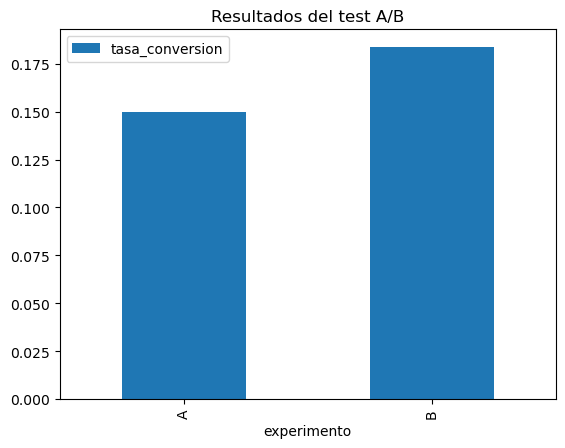

In [6]:
experimentos.plot.bar(x="experimento", y="tasa_conversion", title="Resultados del test A/B")

## ⚖️ Priorizar hipótesis

### 🎯 Cómo y por qué priorizamos
No todas las hipótesis son igual de valiosas o fáciles de probar. Se priorizan usando el método RICE.

### 📊 Parámetro de alcance (Reach)
¿Cuántos usuarios se verían impactados por esta mejora?

In [7]:
alcance = {"Idea A": 1000, "Idea B": 5000}
alcance

{'Idea A': 1000, 'Idea B': 5000}

### ⚡ Impacto (Impact)
¿El cambio tendrá un gran efecto?

In [8]:
impacto = {"Idea A": 3, "Idea B": 2}  # Escala 1-5
impacto

{'Idea A': 3, 'Idea B': 2}

### 🛠 Esfuerzo (Effort)
¿Cuánto trabajo (en horas o costo) requiere esta idea?

In [9]:
esfuerzo = {"Idea A": 20, "Idea B": 10}
esfuerzo

{'Idea A': 20, 'Idea B': 10}

### 🔒 Confianza (Confidence)
¿Confías en los datos o en la intuición para esta hipótesis?

In [10]:
confianza = {"Idea A": 0.9, "Idea B": 0.7}
confianza

{'Idea A': 0.9, 'Idea B': 0.7}

### 🧮 Score RICE

In [11]:
import pandas as pd

rice_df = pd.DataFrame({
    "idea": ["Idea A", "Idea B"],
    "alcance": [1000, 5000],
    "impacto": [3, 2],
    "esfuerzo": [20, 10],
    "confianza": [0.9, 0.7]
})

rice_df["score"] = (rice_df["alcance"] * rice_df["impacto"] * rice_df["confianza"]) / rice_df["esfuerzo"]
rice_df.sort_values("score", ascending=False)

,idea,alcance,impacto,esfuerzo,confianza,score
1,Idea B,5000,2,10,0.7,700.0
0,Idea A,1000,3,20,0.9,135.0
